# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь*** $$ w_{new} = w_{old} - \alpha \nabla_{w}L(w)$$
$$w_{new} = w_{old} - 2 \alpha ( \frac{1}{n} \sum_{i = 1}^{n} ( \langle x_{i}, w_{old} \rangle - y_{i})x_{i} + \frac{w_{old}}{C})$$ $\alpha$ - неотрицательная величина, длина шага оптимизации, может быть задана как невозрастающая $f(k)$, где $k$ - номер шага оптимизации

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь*** $$ w_{new} = w_{old} - \alpha \nabla_{w}L(w)$$
$$ w_{new} = w_{old} - \alpha (\frac{1}{nln2} \sum_{i = 1}^{n} \frac{((1 - y_{i})e^{\langle x_{i}, w_{old} \rangle} - y_{i})x_{i}}{e^{\langle x_{i}, w_{old} \rangle} + 1} + \frac{2 w_{old}}{C})$$
Не похоже на формулу для LinReg, однако:
$$ w_{new} = w_{old} - \alpha (\frac{1}{nln2} \sum_{i = 1}^{n} \frac{((1 - y_{i}) - y_{i}e^{- \langle x_{i}, w_{old} \rangle})x_{i}}{1 + e^{- \langle x_{i}, w_{old} \rangle}} + \frac{2 w_{old}}{C})$$
$$ w_{new} = w_{old} - \alpha (\frac{1}{nln2} \sum_{i = 1}^{n} (\frac{1}{1 + e^{- \langle x_{i}, w_{old} \rangle}} - y_{i})x_{i} + \frac{2 w_{old}}{C})$$
Итого, общая формула для двух алгоритмов имеет вид:
$$ w_{new} = w_{old} - \alpha (\frac{1}{n} \sum_{i = 1}^{n} (a(x_{i}) - y_{i})x_{i} + \frac{w_{old}}{C})$$
(все константы убраны так как не влияют на сходимость)

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Гессиан выглядит так.
$$ H(f(w)) =
 \begin{pmatrix}
  \frac{\partial^{2} f}{\partial w_{0}^{2}} & \frac{\partial^{2} f}{\partial w_{0} \partial w_{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{0} \partial w_{D}} \\
  \frac{\partial^{2} f}{\partial w_{1} \partial w_{0}} & \frac{\partial^{2} f}{\partial w_{0}^{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{1} \partial w_{D}} \\
  \vdots  & \vdots  &  \frac{\partial^{2} f}{\partial w_{i} \partial w_{j}} & \vdots  \\
  \frac{\partial^{2} f}{\partial w_{D} \partial w_{0}} & \frac{\partial^{2} f}{\partial w_{D} \partial w_{1}} & \cdots & \frac{\partial^{2} f}{\partial w_{D}^{2}} 
 \end{pmatrix}$$
 В нашем случае $f(w) = \frac{1}{n}(w^{T} X^{T} X w - w^{T} X^{T}y - y^{T}Xw + y^{T}y)$
 
 Далее деление на $n$ можно опустить, так как мы ищем минимум функции, а умножение на константу на это не влияет
 
 Тогда:
 $$ H(f(w)) = 2
 \begin{pmatrix}
  x_{0}^{T}x_{0} & x_{0}^{T}x_{1} & \cdots & x_{0}^{T}x_{D} \\
  x_{1}^{T}x_{0} & x_{1}^{T}x_{1} & \cdots & x_{1}^{T}x_{D} \\
  \vdots  & \vdots  & x_{i}^{T}x_{j} & \vdots  \\
  x_{D}^{T}x_{0} & x_{D}^{T}x_{1} & \cdots & x_{D}^{T}x_{D}
 \end{pmatrix}$$
 
 Получается, что $ H(f(w)) = 2 X^{T}X \implies \exists B = \sqrt{2} X: B^{T}B = H(f(w))$, при этом X невырождена, так как имеет строк не меньше, чем столбцов и полный ранг $\implies H(f(w))$ положительно определена. 
 
Для L2 регуляризации: 
$$f(w) = \frac{1}{n}(w^{T} X^{T} X w - w^{T} X^{T}y - y^{T}Xw + y^{T}y) + \frac{1}{C}w^{T}w$$
$$ \nabla_{w}f(w) = 2X^{T}Xw - 2X^{T}y + \frac{2}{C}Iw $$
$$ \nabla_{w} f(w) = 0 \iff w = (X^{T}X + \frac{I}{C})^{-1} X^{T}y $$

Нашли решение для линейной регрессии с L2 регуляризацией

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***
$$\frac{dE(L|x_i)}{da(x_i)} = \frac{1}{\ln2}(\frac{-p(y_i = 1 |x_i)}{a(x_i)} + \frac{p(y_i = 0 | x_i)}{1 - a(x_i)
})$$

$$\frac{dE(L|x_i)}{da(x_i)} = \frac{-p(y_i = 1 |x_i) + a(x_i)p(y_i = 1 |x_i) + a(x_i)p(y_i = 0 | x_i)}{\ln 2 \cdot a(x_i)(1 - a(x_i))}$$ 

Воспользуемся тем, что $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

$$\frac{dE(L|x_i)}{da(x_i)} = \frac{a(x_i) - p(y_i = 1 |x_i)}{\ln 2 \cdot a(x_i)(1 - a(x_i))}$$

$$ \frac{dE(L|x_i)}{da(x_i)} = 0 \iff \begin{cases} a(x_i) \neq 0\\ a(x_i) \neq 1\\ a(x_i) = p(y_i = 1 |x_i) \end{cases} $$

Очевидно, $a(x_i) = p(y_i = 1 |x_i)$ - точка минимума мат. ожидания.

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Мы вводим $w_{0}$ чтобы задать значение предсказания в случае, когда все признаки равны нулю или близки к нулю. Такой объект не обязательно имеет целевую переменную 0 (LinReg) или имеет равную вероятность принадлежности обоим классам (LogReg). Но также $w_0$ отвечает за удаление прямой(гиперплоскости) от начала координат и если не регуляризовывать его при условии регуляризации всех остальных, то он получится в разы больше остальных и, скорее всего, разделяющая прямая (гиперплоскость) будет неадекватной. Да, нужно.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам ***не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [3]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [4]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [5]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [6]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [7]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    X = np.array(X)
    y = np.array(y)
    if not shuffle:
        begin = 0
        end = batch_size
        while end < y.size:
            yield (X[begin:end], y[begin:end])
            begin += batch_size
            end += batch_size
        yield (X[begin::], y[begin::])
    else:
        ind = np.array(range(y.size))
        while ind.size > batch_size:
            batch_ind = np.random.choice(np.arange(ind.size),
                                         size=batch_size,
                                         replace=False)
            batch = ind[batch_ind]
            ind = np.delete(ind, batch_ind)
            yield(X[batch], y[batch])
        yield(X[ind], y[ind])

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin
from math import exp, log2, log


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    try:
        sigm_value_x = 1/(1 + exp(-x))
        return sigm_value_x
    except OverflowError:
        return 0


def mylog2(x):
    if x == 0.0:
        return -1.3131231e+70
    return log2(x)


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator,
                 C=1, alpha=0.01, max_epoch=10, model_type='lin_reg',
                 batch_size=1, border=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.border = border
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        X = np.array(X_batch)
        add = np.array([1] * (X.shape[0]))
        add = add.reshape(-1, 1)
        X = np.hstack((add, X))
        y = np.array(y_batch)
        w = np.array(self.weights)
        loss = X * w
        loss = loss.sum(axis=1)
        loss = loss.reshape(1, -1)
        loss = loss.ravel()
        if self.model_type == 'lin_reg':
            loss = loss - y
            loss = loss ** 2
            loss = loss.sum()
        elif self.model_type == 'log_reg':
            loss = np.array(list(map(sigmoid, loss)))
            one_loss = loss[np.where(y == 1)]
            one_loss = np.array(list(map(mylog2, one_loss)))
            one_loss_sum = np.sum(one_loss)
            zero_loss = loss[np.where(y == 0)]
            zero_loss = -zero_loss
            zero_loss = zero_loss + 1
            zero_loss = np.array(list(map(mylog2, zero_loss)))
            zero_loss_sum = zero_loss.sum()
            loss = zero_loss_sum + one_loss_sum
            loss = -loss
        loss /= y.size
        reg = w ** 2
        reg = reg.sum()
        reg /= self.C
        loss += reg
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        X = np.array(X_batch)
        add = np.array([1] * (X.shape[0]))
        add = add.reshape(-1, 1)
        X = np.hstack((add, X))
        y = np.array(y_batch).reshape(1, -1)
        w = np.array(self.weights).reshape(1, -1)
        a = X * w
        a = a.sum(axis=1)
        a = a.ravel()
        if self.model_type == 'log_reg':
            a = np.array(list(map(sigmoid, a))) 
        a = a - y
        a = a.reshape(-1, 1)
        loss_grad = X * a
        loss_grad = loss_grad.mean(axis=0)
        reg = w / self.C
        if self.model_type == 'log_reg':
            loss_grad = loss_grad / log(2)
            reg = reg * 2
        loss_grad = loss_grad + reg
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - (new_grad * self.alpha)
        
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        X = np.array(X)
        y = np.array(y)
        np.random.seed(0)
        self.weights = np.random.randint(1, 100, size=(X.shape[1] + 1))
        self.weights = self.weights.astype(float)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, shuffle=True, batch_size = self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        batch_loss = self.calc_loss(X, y)
        self.errors_log['loss'].append(batch_loss)
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X1 = np.array(X)
        add = np.array([1] * (X1.shape[0]))
        add = add.reshape(-1, 1)
        X1 = np.hstack((add, X1))
        w = np.array(self.weights)
        y_hat = X1 * w
        y_hat = y_hat.sum(axis=1)
        y_hat = y_hat.ravel()
        if self.model_type == 'log_reg':
            y_hat = np.array(list(map(sigmoid, y_hat)))
            y_hat = (y_hat >= self.border).astype(int) 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [9]:
def my_plot_decision_boundary(clf):
    x = np.linspace(-50, 50)
    y = ((clf.weights[0][1]) * x + clf.weights[0][0])/(-clf.weights[0][2])
    line1, = plt.plot(x, y, '-g', label='mySGD')
    return line1

[[-0.08130203  0.23897376 -0.13565709]]


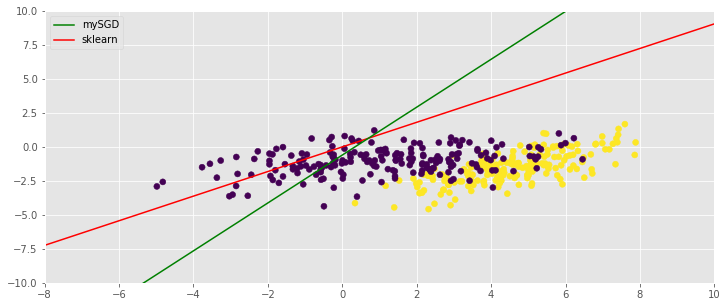

In [10]:
from sklearn.linear_model import SGDClassifier

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.05)
my_clf.fit(X, y)

clf = SGDClassifier(loss='log').fit(X, y)
x = np.linspace(-50, 50)
k = ((clf.coef_[0][0]) * x)/(-clf.coef_[0][1])
line2, = plt.plot(x, k, '-r', label='sklearn')

line1 = my_plot_decision_boundary(my_clf)
print(my_clf.weights)

plt.legend(handles=[line1, line2])
plt.ylim(-10, 10)
plt.xlim(-8, 10)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Видимо, sklearn.SGDClassifier всё же работает немного по-другому

[ 0.14354486 -0.17043888]
[[ 0.01608667  0.12142962 -0.1326801 ]]


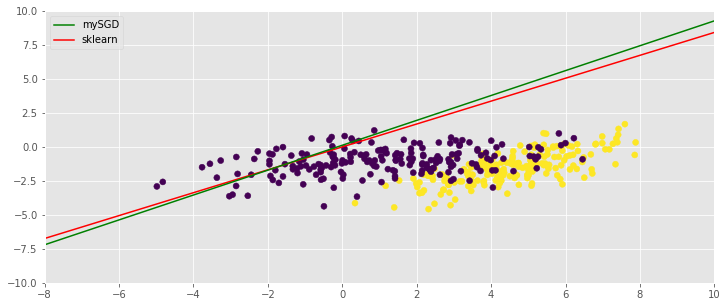

In [11]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_clf = MySGDClassifier(batch_generator, model_type='lin_reg')
my_clf.fit(X, y)

clf = LinearRegression().fit(X, y)

print(clf.coef_)
x = np.linspace(-50, 50)
k = ((clf.coef_[0]) * x)/(-clf.coef_[1])
line2, = plt.plot(x, k, '-r', label='sklearn')

line1 = my_plot_decision_boundary(my_clf)
print(my_clf.weights)

plt.legend(handles=[line1, line2])
plt.ylim(-10, 10)
plt.xlim(-8, 10)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [13]:
from sklearn.datasets import make_classification

In [14]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

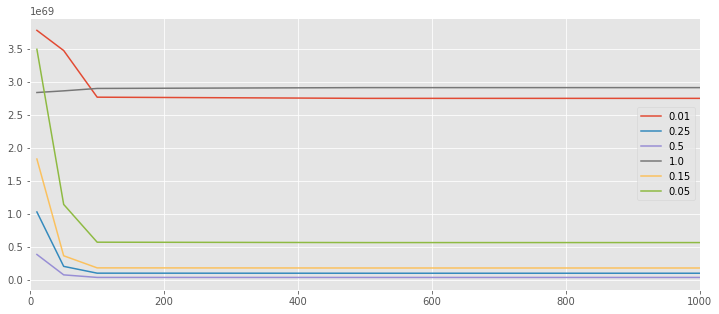

In [15]:
clf = MySGDClassifier(batch_generator, model_type='log_reg')
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line1, = plt.plot(N_mas, mas, label='0.01')

clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.25)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line2, = plt.plot(N_mas, mas, label='0.25')

clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.5)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line3, = plt.plot(N_mas, mas, label='0.5')

clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=1.0)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line4, = plt.plot(N_mas, mas, label='1.0')

clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.15)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line5, = plt.plot(N_mas, mas, label='0.15')

clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.05)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line6, = plt.plot(N_mas, mas, label='0.05')

plt.xlim(0, 1000)

plt.legend(handles=[line1, line2, line3, line4, line5, line6])
plt.show()

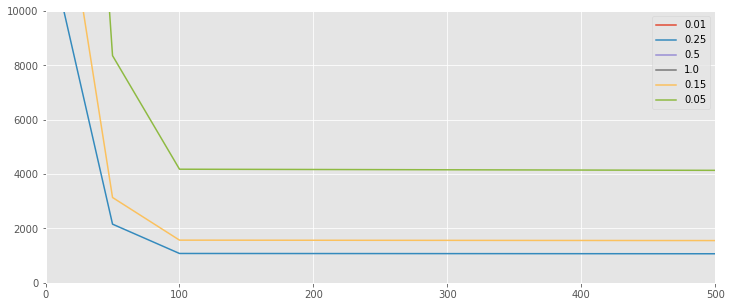

In [16]:
clf = MySGDClassifier(batch_generator, model_type='lin_reg')
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line1, = plt.plot(N_mas, mas, label='0.01')

clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.25)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line2, = plt.plot(N_mas, mas, label='0.25')

clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.5)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line3, = plt.plot(N_mas, mas, label='0.5')

clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=1.0)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line4, = plt.plot(N_mas, mas, label='1.0')

clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.15)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line5, = plt.plot(N_mas, mas, label='0.15')

clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.05)
clf.fit(X, y)
N_mas = [10, 50, 100, 500, 1000, 10000, 100000, 1000000]
mas = []
for i in N_mas:
    mas.append(np.mean(clf.errors_log['loss'][:i]))
line6, = plt.plot(N_mas, mas, label='0.05')

plt.xlim(0, 500)
plt.ylim(0, 10000)

plt.legend(handles=[line1, line2, line3, line4, line5, line6])
plt.show()

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

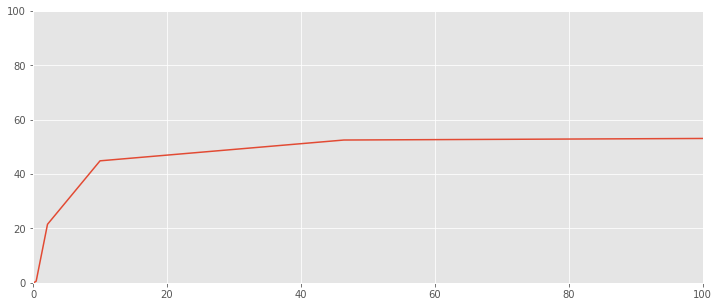

In [17]:
x = np.logspace(3, -3, 10)
p = []
for i in x:
    p.append(np.mean(MySGDClassifier(batch_generator,
                                     model_type='log_reg',
                                     C=i).fit(X, y).weights))
plt.plot(x, p)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

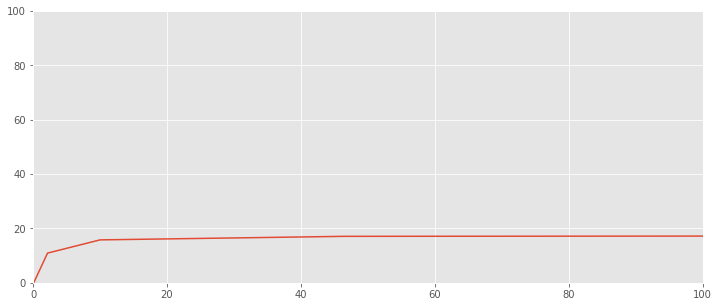

In [18]:
x = np.logspace(3, -3, 10)
p = []
for i in x:
    p.append(np.mean(MySGDClassifier(batch_generator,
                                     model_type='lin_reg',
                                     C=i).fit(X, y).weights))
plt.plot(x, p)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [20]:
doc_to_title = {}
with open('../project/anomaly-detection-competition-ml1-ts-fall-2019/docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [21]:
import pandas as pd
train_data = pd.read_csv('../project/anomaly-detection-competition-ml1-ts-fall-2019/train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [22]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [23]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [24]:
st = StandardScaler()
X = st.fit_transform(X_train, y_train)
print(X.shape)

(11690, 15)


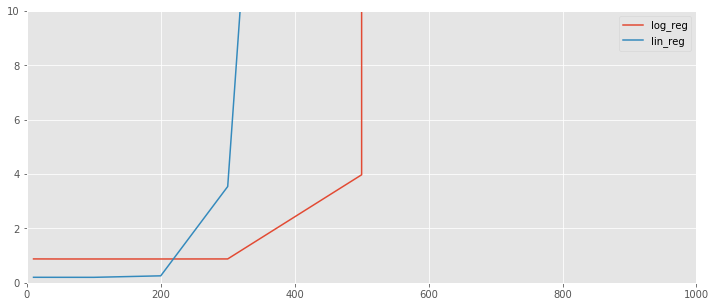

In [25]:
mas = [10, 50, 100, 200, 300, 500, 1000]
mas1 = []
mas2 = []
for i in mas:
    my_clf = MySGDClassifier(batch_generator,
                             model_type='log_reg',
                             batch_size=i).fit(X, y_train)
    mas1.append(my_clf.errors_log['loss'][-1])
    my_clf = MySGDClassifier(batch_generator,
                             model_type='lin_reg',
                             batch_size=i).fit(X, y_train)
    mas2.append(my_clf.errors_log['loss'][-1])
l1, = plt.plot(mas, mas1, label='log_reg')
l2, = plt.plot(mas, mas2, label='lin_reg')
plt.legend(handles=[l1, l2])
plt.xlim(0, 1000)
plt.ylim(0, 10)
plt.show()

Выберем batch_size = 100

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [28]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=3, shuffle=True)

c_range = [0.1, 1, 10, 30]
alpha_range = [0.01, 0.05, 0.15, 0.25]
max_epoch_range = [5, 10, 50]

best_set = {}
max_score = 0.0

for c in c_range:
    for alpha in alpha_range:
        for max_epoch in max_epoch_range:
            clf = MySGDClassifier(batch_generator,
                                  C=c,
                                  alpha=alpha,
                                  max_epoch=max_epoch,
                                  model_type='log_reg', batch_size=100)
            sp = kf.split(X)
            scores = []
            for train_ind, test_ind in sp:
                clf.fit(X[train_ind], y_train[train_ind])
                scores.append(f1_score(y_train[test_ind],
                                       clf.predict(X[test_ind])))
            score = np.mean(np.array(scores))
            if score > max_score:
                best_set = {'C': c, 'alpha': alpha,
                            'max_epoch': max_epoch, 'model_type': 'log_reg'}
                max_score = score
            print('''done for set {} {} {} 
            by log_reg, score = {}'''.format(c, alpha, max_epoch, score))
            clf = MySGDClassifier(batch_generator,
                                  C=c, alpha=alpha,
                                  max_epoch=max_epoch,
                                  model_type='lin_reg', batch_size=100)
            sp = kf.split(X)
            scores = []
            for train_ind, test_ind in sp:
                clf.fit(X[train_ind], y_train[train_ind])
                scores.append(f1_score(y_train[test_ind],
                                       (clf.predict(X[test_ind]) >= 0.5)
                                       .astype(int)))
            score = np.mean(np.array(scores))
            if score > max_score:
                best_set = {'C': c, 'alpha': alpha,
                            'max_epoch': max_epoch, 'model_type': 'lin_reg'}
                max_score = score
            print('''done for set {} {} {}
            by lin_reg, score = {}'''.format(c, alpha, max_epoch, score))
print(best_set)
print(max_score)

done for set 0.1 0.01 5 
            by log_reg, score = 0.6175509387834789
done for set 0.1 0.01 5
            by lin_reg, score = 0.012357166697339392
done for set 0.1 0.01 10 
            by log_reg, score = 0.6174208724316649
done for set 0.1 0.01 10
            by lin_reg, score = 0.017110211869456184
done for set 0.1 0.01 50 
            by log_reg, score = 0.6166462877996745
done for set 0.1 0.01 50
            by lin_reg, score = 0.016735765317974074
done for set 0.1 0.05 5 
            by log_reg, score = 0.6181445816676097
done for set 0.1 0.05 5
            by lin_reg, score = 0.04761691823526662
done for set 0.1 0.05 10 
            by log_reg, score = 0.6158974652978193
done for set 0.1 0.05 10
            by lin_reg, score = 0.04445208453039756
done for set 0.1 0.05 50 
            by log_reg, score = 0.6177199029813333
done for set 0.1 0.05 50
            by lin_reg, score = 0.02618282948745437
done for set 0.1 0.15 5 
            by log_reg, score = 0.6093472954333905


/Users/azelentsov/PycharmProjects/ml/venv/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in square
/Users/azelentsov/PycharmProjects/ml/venv/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in double_scalars
/Users/azelentsov/PycharmProjects/ml/venv/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: overflow encountered in square


done for set 0.1 0.15 5
            by lin_reg, score = 0.6145836533390213
done for set 0.1 0.15 10 
            by log_reg, score = 0.609413483016558


/Users/azelentsov/PycharmProjects/ml/venv/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in greater_equal


done for set 0.1 0.15 10
            by lin_reg, score = 0.0


/Users/azelentsov/PycharmProjects/ml/venv/lib/python3.6/site-packages/ipykernel_launcher.py:109: RuntimeWarning: overflow encountered in multiply
/Users/azelentsov/PycharmProjects/ml/venv/lib/python3.6/site-packages/ipykernel_launcher.py:166: RuntimeWarning: invalid value encountered in greater_equal


done for set 0.1 0.15 50 
            by log_reg, score = 0.0
done for set 0.1 0.15 50
            by lin_reg, score = 0.0
done for set 0.1 0.25 5 
            by log_reg, score = 0.6093472954333905
done for set 0.1 0.25 5
            by lin_reg, score = 0.615094382062035


/Users/azelentsov/PycharmProjects/ml/venv/lib/python3.6/site-packages/ipykernel_launcher.py:106: RuntimeWarning: overflow encountered in true_divide


done for set 0.1 0.25 10 
            by log_reg, score = 0.0
done for set 0.1 0.25 10
            by lin_reg, score = 0.0
done for set 0.1 0.25 50 
            by log_reg, score = 0.0
done for set 0.1 0.25 50
            by lin_reg, score = 0.0
done for set 1 0.01 5 
            by log_reg, score = 0.6142548319273382
done for set 1 0.01 5
            by lin_reg, score = 0.38421790199944184
done for set 1 0.01 10 
            by log_reg, score = 0.61438592158749
done for set 1 0.01 10
            by lin_reg, score = 0.3311843044514708
done for set 1 0.01 50 
            by log_reg, score = 0.6148771671206016
done for set 1 0.01 50
            by lin_reg, score = 0.308461154757451
done for set 1 0.05 5 
            by log_reg, score = 0.6153227006447362
done for set 1 0.05 5
            by lin_reg, score = 0.30984758998951406
done for set 1 0.05 10 
            by log_reg, score = 0.6143369606538583
done for set 1 0.05 10
            by lin_reg, score = 0.3222181786252576
done for set 1

/Users/azelentsov/PycharmProjects/ml/venv/lib/python3.6/site-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in subtract


done for set 1 0.25 50
            by lin_reg, score = 0.0
done for set 10 0.01 5 
            by log_reg, score = 0.6094828419780534
done for set 10 0.01 5
            by lin_reg, score = 0.384024747890765
done for set 10 0.01 10 
            by log_reg, score = 0.6096201035522067
done for set 10 0.01 10
            by lin_reg, score = 0.3982542830143883
done for set 10 0.01 50 
            by log_reg, score = 0.5770168806702252
done for set 10 0.01 50
            by lin_reg, score = 0.4621456258381145
done for set 10 0.05 5 
            by log_reg, score = 0.6070758679687556
done for set 10 0.05 5
            by lin_reg, score = 0.433712899702027
done for set 10 0.05 10 
            by log_reg, score = 0.574650482478357
done for set 10 0.05 10
            by lin_reg, score = 0.4712343009991926
done for set 10 0.05 50 
            by log_reg, score = 0.5760755647053547
done for set 10 0.05 50
            by lin_reg, score = 0.40942132626532696
done for set 10 0.15 5 
            by lo

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [31]:
mas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
max_score = 0.0
best_border = 0.0
for i in mas:
    clf = MySGDClassifier(batch_generator, C=0.1, alpha=0.05, max_epoch=5,
                          model_type='log_reg', batch_size=100, border=i)
    sp = kf.split(X)
    scores = []
    for train_ind, test_ind in sp:
        clf.fit(X[train_ind], y_train[train_ind])
        scores.append(f1_score(y_train[test_ind],
                               clf.predict(X[test_ind])))
    score = np.mean(np.array(scores))
    if score > max_score:
        max_score = score
        best_border = i
    print('done for border {}, score = {}'.format(i, score))
print(max_score)
print(best_border)

done for border 0.1, score = 0.44653798145973367
done for border 0.2, score = 0.44657130932297107
done for border 0.3, score = 0.44657130932297107
done for border 0.4, score = 0.44657130932297107
done for border 0.5, score = 0.6178538850169235
done for border 0.6, score = 0.180711916350651
done for border 0.7, score = 0.007172207332882881
done for border 0.8, score = 0.0
done for border 0.9, score = 0.0
0.6178538850169235
0.5


In [32]:
import pandas as pd
test_data = pd.read_csv('../project/anomaly-detection-competition-ml1-ts-fall-2019/test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [33]:
import numpy as np
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)
print(groups_test)

(16627, 15) (16627,)
[130 130 130 ... 309 309 309]


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [34]:
clf = MySGDClassifier(batch_generator, C=0.1, alpha=0.05, max_epoch=5,
                      model_type='log_reg', batch_size=100, border=0.5)
clf.fit(X, y_train)

st = StandardScaler()
X_test = st.fit_transform(X_test)
print(X_test.shape)

y = clf.predict(X_test)
u, counts = np.unique(y, return_counts=True)
print(counts)
r = range(11691, 28318)
print(len(r))

(16627, 15)
[10962  5665]
16627


In [35]:
data = {'pair_id' : range(11691, 28318), 'target': y}
res = pd.DataFrame(data)
res.to_csv('sec_pred.csv', index=False)

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Вроде бы всё понятно.